# Points

Creates linear transformation of the original features

Number of such transformations are 1 less than the number of classes

Very Similar to PCA, LDA is supervised

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [53]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

In [54]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)
X_r2[:5]

array([[ 8.06179978,  0.30042062],
       [ 7.12868772, -0.78666043],
       [ 7.48982797, -0.26538449],
       [ 6.81320057, -0.67063107],
       [ 8.13230933,  0.51446253]])

In [55]:
lda.explained_variance_ratio_

array([0.9912126, 0.0087874])

# LDA VS PCA

In [56]:
pca = PCA(n_components=4)
X_r = pca.fit(X).transform(X)
X_r[:5]


array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
        -2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
        -9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
        -1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
         7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
         6.12585926e-02]])

In [57]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

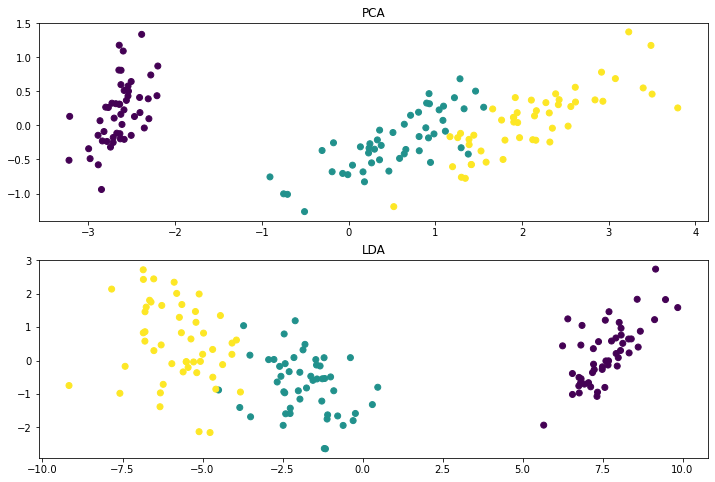

In [58]:
plt.figure(figsize=(12,8))
from pylab import *
subplot(2,1,1)
title("PCA")
plt.scatter(X_r[:,0],X_r[:,1],c=y)
subplot(2,1,2)
title("LDA")
plt.scatter(X_r2[:,0],X_r2[:,1],c=y)
plt.show()

In [59]:
import seaborn as sns
df=pd.DataFrame(zip(X_r[:,0],X_r[:,1],X_r2[:,0],X_r2[:,1],y),columns=["pc1","pc2","ld1","ld2","class"])
df

,pc1,pc2,ld1,ld2,class
0,-2.684126,0.319397,8.061800,0.300421,0
1,-2.714142,-0.177001,7.128688,-0.786660,0
2,-2.888991,-0.144949,7.489828,-0.265384,0
3,-2.745343,-0.318299,6.813201,-0.670631,0
4,-2.728717,0.326755,8.132309,0.514463,0
...,...,...,...,...,...
145,1.944110,0.187532,-5.645003,1.677717,2
146,1.527167,-0.375317,-5.179565,-0.363475,2
147,1.764346,0.078859,-4.967741,0.821141,2
148,1.900942,0.116628,-5.886145,2.345091,2


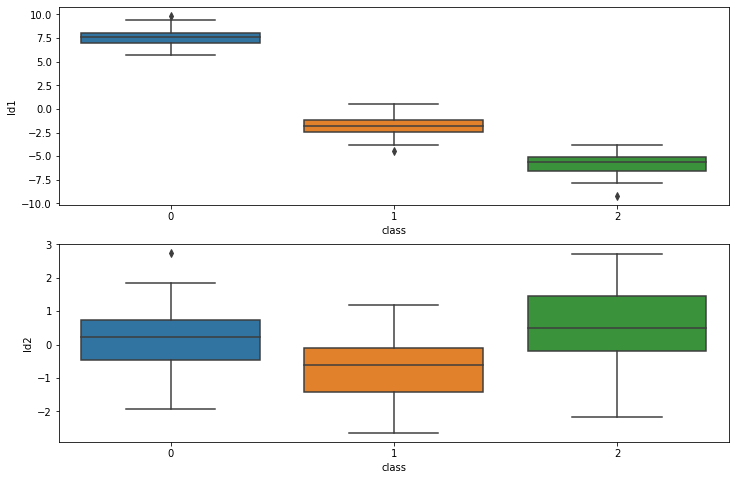

In [60]:
plt.figure(figsize=(12,8))
subplot(2,1,1)
sns.boxplot(x='class', y='ld1', data=df)
subplot(2,1,2)
sns.boxplot(x='class', y='ld2', data=df)
plt.show()

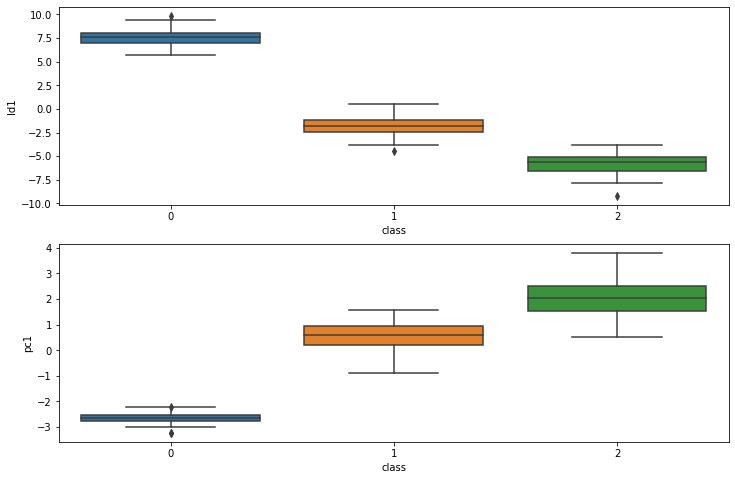

In [61]:
plt.figure(figsize=(12,8))
subplot(2,1,1)
sns.boxplot(x='class', y='ld1', data=df)
subplot(2,1,2)
sns.boxplot(x='class', y='pc1', data=df)
plt.show()

# LDA as a classifier

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=2)

In [25]:
from sklearn.metrics import accuracy_score
y_pred = lda.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9736842105263158


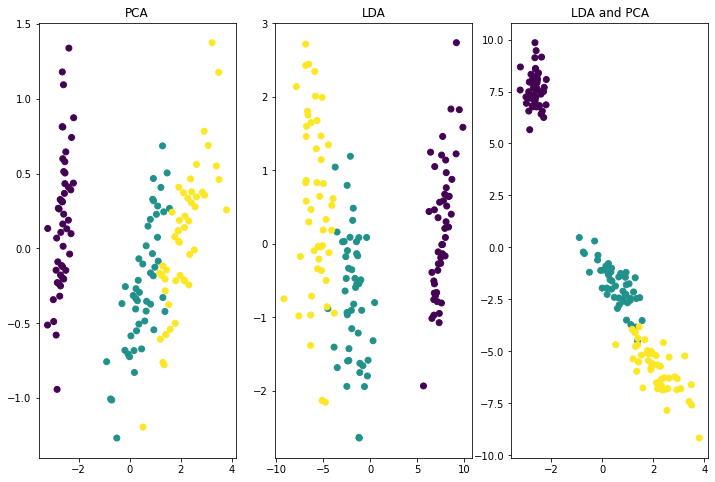

In [64]:
plt.figure(figsize=(12,8))
from pylab import *
subplot(1,3,1)
title("PCA")
plt.scatter(X_r[:,0],X_r[:,1],c=y)
subplot(1,3,2)
title("LDA")
plt.scatter(X_r2[:,0],X_r2[:,1],c=y)
subplot(1,3,3)
title("LDA and PCA")
plt.scatter(X_r[:,0],X_r2[:,0],c=y)
plt.show()

# MNIST Dataset

In [27]:
mnist_train=pd.read_csv("mnist_train.csv")
mnist_test=pd.read_csv("mnist_test.csv")

In [31]:
mnist_train.shape

(60000, 785)

In [35]:
mnist_train["label"].unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=int64)

In [32]:
mnist_test.shape

(10000, 785)

In [28]:
mnist_test.head(1)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
mnist_train.head(1)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
y_train=mnist_train.iloc[:,0]
X_train=mnist_train.iloc[:,1:785]

In [39]:
lda = LinearDiscriminantAnalysis(n_components=9)
X_train_r2 = lda.fit(X_train, y_train).transform(X_train)

In [40]:
X_train_r2[:5]

array([[-0.90459877, -0.63847802, -1.75505615, -0.23832855,  0.64229719,
         4.02829509,  0.81895683,  1.6799928 , -0.78436177],
       [-2.89955639, -3.3132971 , -2.86590966, -0.13627512, -3.03271746,
        -0.48617749,  0.41748093, -0.91252842, -0.19437836],
       [ 1.96972762,  0.06783832,  1.08427916,  0.36864565,  0.91484818,
        -1.49865758,  2.09208364,  1.69372449,  2.93857893],
       [ 0.35187156,  4.01341538, -0.22033816,  0.52731541, -1.57853864,
        -0.31261262, -0.07473703,  0.57264007,  0.7790478 ],
       [ 3.21078934, -1.4473566 ,  0.63971761,  0.38403683, -1.19969278,
        -1.44551324, -0.68219998, -2.00358284, -1.82819148]])

In [41]:
lda.explained_variance_ratio_

array([0.2392286 , 0.20180995, 0.17849695, 0.10652571, 0.09406712,
       0.06906025, 0.04973746, 0.03429077, 0.0267832 ])

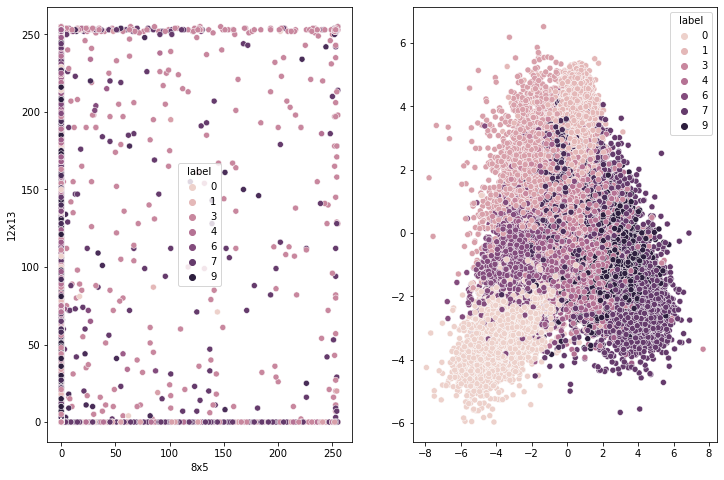

In [49]:
plt.figure(figsize=(12,8))
subplot(1,2,1)
sns.scatterplot(data=mnist_train,x=X_train.iloc[:,200],y=X_train.iloc[:,320],hue=y_train)
subplot(1,2,2)
sns.scatterplot(data=mnist_train,x=X_train_r2[:,0],y=X_train_r2[:,1],hue=y_train)
plt.show()

In [50]:
y_test=mnist_test.iloc[:,0]
X_test=mnist_test.iloc[:,1:785]

In [51]:
from sklearn.metrics import accuracy_score
y_pred = lda.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.873
